# Prediction using Decision Tree Algorithm #
(Level - Intermediate)\
Create the Decision Tree classifier and visualize it graphically.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading the data frame into the memory
df=pd.read_csv('Iris (1).csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
#Renaming the entries in "Species"
for i in ['Iris-setosa','Iris-versicolor','Iris-virginica']:
     df['Species']=df['Species'].replace(to_replace=i,value=i.split('-')[1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Data Analysis
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
#Reshaping the data to fit into model
X=df.iloc[:,:4]
y=df.Species

In [11]:
#Training and Testing Algorithm
from sklearn.model_selection import train_test_split

In [12]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [13]:
#Model Selecetion
#Decision Trees are a non-parametric supervised learning method used for classification and regression. 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [14]:
#Fitting the data into the classifier
model= DecisionTreeClassifier(criterion='gini')
model.fit(Xtrain,ytrain)
#Predicting labels for testing set
ymodel=model.predict(Xtest)
ymodel

array(['setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'setosa'], dtype=object)

In [15]:
conda install python-graphviz

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [16]:
dot_data = tree.export_graphviz(model,
                                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],  
                                class_names=np.array(['setosa', 'versicolor', 'virginica']),
                                filled=True)


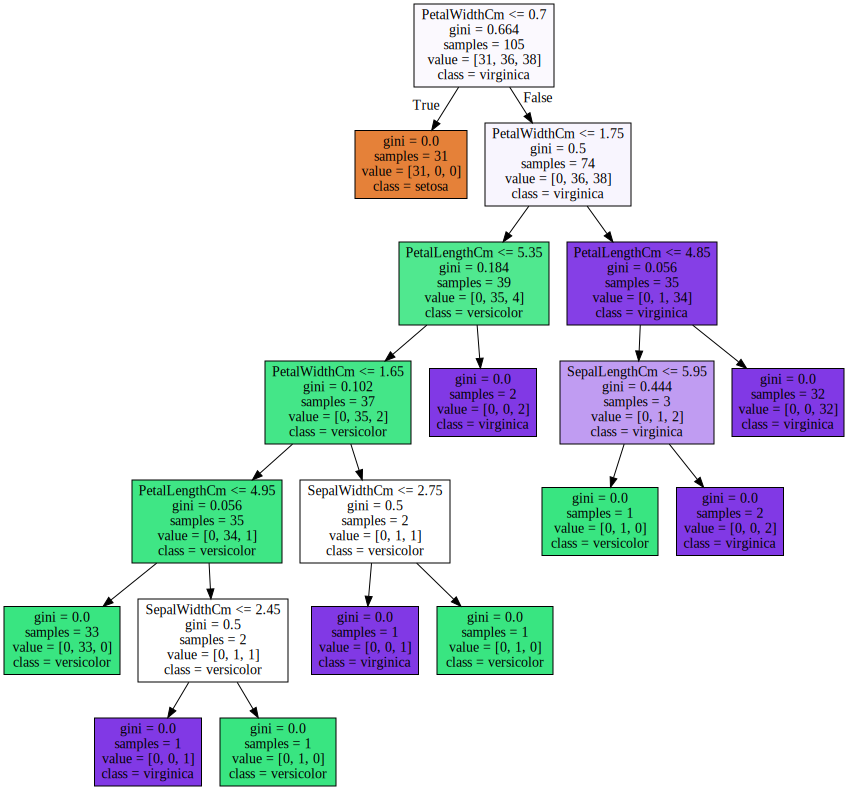

In [17]:
# Draw decision tree graph
import graphviz
graph = graphviz.Source(dot_data, format="png") 
graph